In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #正常显示负号

In [2]:
df = pd.read_csv('Temp.csv')
df.head(10)

,职位,公司,工作地点,福利,学历,经验年数,招聘人数,最低工资,最高工资,福利值
0,ERP实施,金蝶软件合肥分公司,合肥,"绩效奖金,定期体检,员工旅游,年终奖金,弹性工作,专业培训",本科,0.0,5,0.40,0.60,176
1,数据仓库工程师,土巴兔装修网,深圳,"五险一金,员工旅游,交通补贴,绩效奖金,股票期权,弹性工作,定期体检,专业培训",无学历要求,0.0,1,1.50,3.00,268
2,软件测试工程师,证通股份有限公司,上海,"做五休二,补充公积金,补充医疗保险,节日福利,免费班车,餐饮补贴",本科,0.0,2,1.50,3.00,166
3,C#.NET开发工程师,武汉微诚科技股份有限公司西安研发中心,西安,"保险,交通补贴,餐饮补贴,绩效奖金,年终奖金,专业培训",本科,6.0,5,0.60,1.50,191
4,C++研发工程师,北京凯罗斯软件科技有限公司,北京,无,本科,0.0,2,1.00,1.50,0
5,PHP开发工程师,上海菜花文化传媒有限公司,上海,无,大专,6.0,1,2.00,2.50,0
6,产品运营,健客网,东莞,"五险一金,员工旅游,绩效奖金,提供住宿,房屋补贴",本科,1.0,2,0.30,0.50,205
7,C#.NET开发工程师,昆明新奇星科技有限公司,昆明,"五险一金,员工旅游,年终奖金,定期体检,专业培训,餐饮补贴",大专,1.0,3,0.35,0.45,221
8,软件测试工程师,睿思商业智能（深圳）有限公司,深圳,"做五休二,周末双休,带薪年假,五险一金,免费班车,节日福利,交通补贴,餐饮补贴,加班补贴,通讯补贴",大专,0.0,6,0.50,0.80,360
9,区块链工程师,广州畅游互动信息技术有限公司,广州,"带薪年假,节日福利,专业培训",本科,0.0,1,2.50,3.50,83


In [3]:
# 计算出平均工资，删除工资为0的异常数据
df['平均工资']=df['最低工资']/2+df['最高工资']/2
df = df[~df['平均工资'].isin([0])]

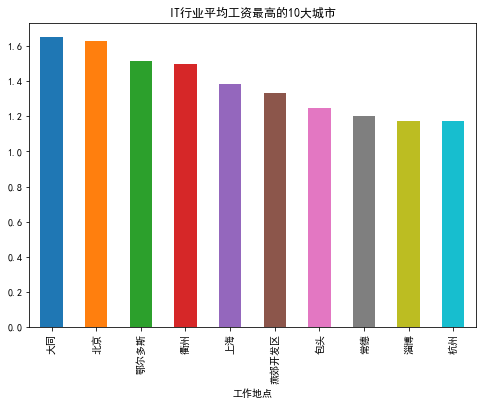

In [4]:
#分析各个城市平均工资
s=df.groupby('工作地点')['平均工资'].mean()
s.sort_values(ascending=False,inplace=True)
s.head(10).plot(kind='bar',figsize=(8,5.6), title='IT行业平均工资最高的10大城市')
plt.show()

In [5]:
df[df['工作地点'].isin(['大同'])]

,职位,公司,工作地点,福利,学历,经验年数,招聘人数,最低工资,最高工资,福利值,平均工资
26666,Java开发工程师,厦门唐普信息技术有限公司,大同,"五险一金,免费班车,交通补贴,餐饮补贴,通讯补贴,出国机会,绩效奖金,年终奖金,弹性工作,员工旅游",大专,3.5,10,0.6,2.5,340,1.55
26667,SAP ABAP顾问,厦门唐普信息技术有限公司,大同,"五险一金,免费班车,交通补贴,餐饮补贴,通讯补贴,出国机会,绩效奖金,年终奖金,弹性工作,员工旅游",大专,3.5,10,0.6,2.9,340,1.75


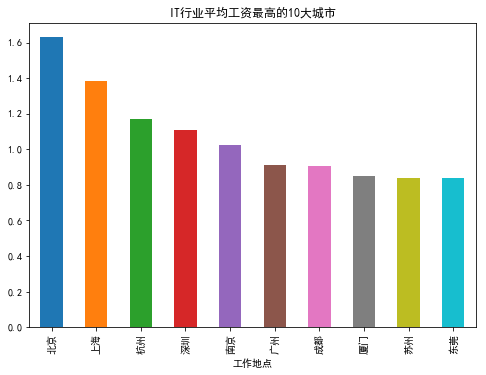

In [6]:
#原来是因为数据量太小
# 基于这个城市，我准备把数量少的城市的数据删除再来作图。
s=df.groupby('工作地点')['工作地点'].count()
s.sort_values(ascending=False,inplace=True)
sf = df[df['工作地点'].isin(s.head(30).index)]
sf=sf[~sf['工作地点'].isin(['异地招聘'])]
s=sf.groupby('工作地点')['平均工资'].mean()
s.sort_values(ascending=False,inplace=True)
s.head(10).plot(kind='bar',figsize=(8,5.6), title='IT行业平均工资最高的10大城市')
plt.show()

加载图片成功！
开始加载文本


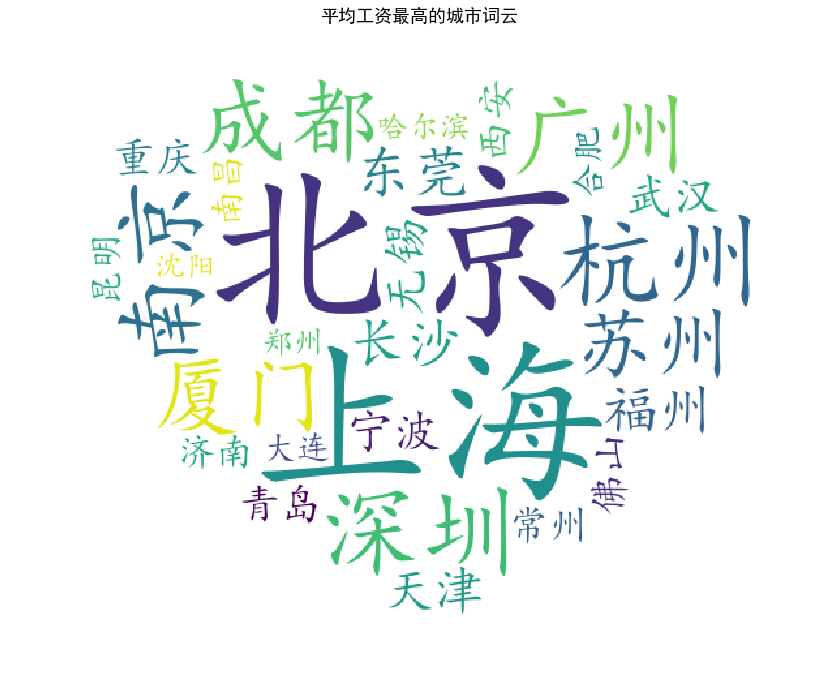

In [7]:
#创建词云
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#将dataframe转成字典
cloud_dict = dict(s)

backgroud_Image = plt.imread('heart.jpg')
print('加载图片成功！')
#print(backgroud_Image)
'''设置词云样式'''
wc = WordCloud(
    background_color='white',# 设置背景颜色
    mask=backgroud_Image,# 设置背景图片
    font_path='C:\Windows\Fonts\simkai.ttf',  # 若是有中文的话，这句代码必须添加，不然会出现方框，不出现汉字
    max_words=2000, # 设置最大现实的字数
    stopwords=STOPWORDS,# 设置停用词
    max_font_size=150,# 设置字体最大值
    min_font_size=8,
    random_state=32# 设置有多少种随机生成状态，即有多少种配色方案
)
wc.fit_words(cloud_dict)
print('开始加载文本')
#改变字体颜色
img_colors = ImageColorGenerator(backgroud_Image)
#字体颜色为背景图片的颜色
#wc.recolor(color_func=img_colors)
# 显示词云图
plt.figure(figsize=(14,12))
plt.imshow(wc)
# 是否显示x轴、y轴下标
plt.axis('off')
plt.title("平均工资最高的城市词云",fontsize=18)
plt.show()
wc.to_file('city_salary.png')

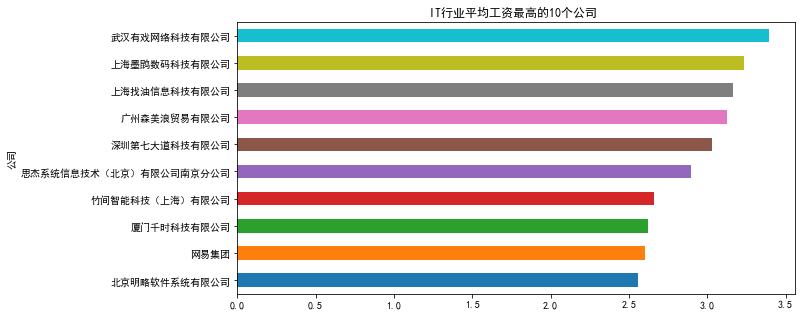

In [8]:
#我们再来看看哪些公司工资高
d=df.groupby('公司')['公司'].count()
d.sort_values(ascending=False,inplace=True)
d.head(1000)
ff = df[df['公司'].isin(d.head(1000).index)]
d = ff.groupby('公司')['平均工资'].mean()
d.sort_values(ascending=True,inplace=True)
d.tail(10).plot(kind='barh',figsize=(10,5), title='IT行业平均工资最高的10个公司 ')
plt.show()


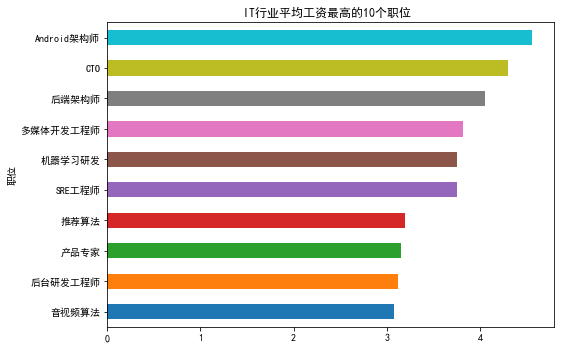

职位
Java架构师       2.628833
PHP架构师        2.666667
大数据研发工程师      2.683333
Web架构师        2.750000
大数据架构师        2.855870
NLP           2.873958
流媒体开发工程师      2.900000
iOS研发         2.911765
研发总监          3.000000
架构师           3.029369
音视频算法         3.077778
后台研发工程师       3.122581
产品专家          3.150000
推荐算法          3.191176
SRE工程师        3.750000
机器学习研发        3.750000
多媒体开发工程师      3.821429
后端架构师         4.054167
CTO           4.295909
Android架构师    4.562500
Name: 平均工资, dtype: float64

In [9]:
#我们再来看看哪些岗位工资高
d=df.groupby('职位')['职位'].count()
d.sort_values(ascending=False,inplace=True)
d.head(1000)
ff = df[df['职位'].isin(d.head(1000).index)]
d = ff.groupby('职位')['平均工资'].mean()
d.sort_values(ascending=True,inplace=True)
d.tail(10).plot(kind='barh',figsize=(8,5.6), title='IT行业平均工资最高的10个职位 ')
plt.show()
d.tail(20)

In [10]:
##定义自动标注的函数
def autolabel(rects, ypos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *ypos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'top', 'bottom'}.
    """

    ypos = ypos.lower()  # normalize the case of the parameter
    va = {'center': 'center', 'bottom': 'top', 'top': 'bottom'}
    offset = {'center': 0.5, 'top': 0.57, 'bottom': 0.43}  # x_txt = x + w*off

    for rect in rects:
        width = rect.get_width()
        ax.text(1.01*width,rect.get_y() + rect.get_height()*offset[ypos],
                '{}'.format(width), va=va[ypos], ha='left',fontsize=12)

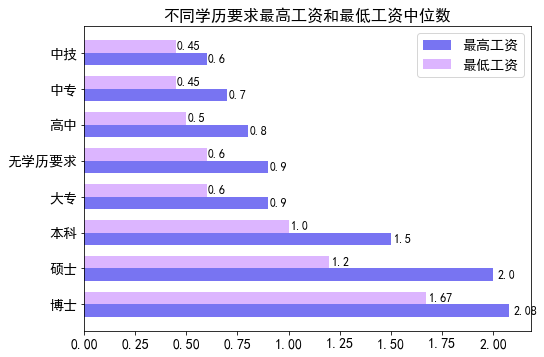

In [11]:
#不同学历的最高工资和最低工资的中位数
degree_sal = df.groupby('学历')['最高工资','最低工资'].median().apply(lambda x:round(x,2)).\
sort_values(by = ['最高工资','最低工资'],ascending=False)

N = 8
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots()
fig.set_size_inches(8,5.6)
rects1 = ax.barh(ind - width/2, degree_sal['最高工资'], width,color='#7874f2')
rects2 = ax.barh(ind + width/2, degree_sal['最低工资'], width,color='#dcb5ff')

plt.yticks(np.arange(N),degree_sal.index)
plt.tick_params(labelsize=14)
# plt.xlabel('工资')
# plt.ylabel('方向')
plt.title('不同学历要求最高工资和最低工资中位数',fontsize=16)
ax.legend((rects1[0], rects2[0]), ('最高工资', '最低工资'),fontsize=14)
autolabel(rects1,'center')
autolabel(rects2,'center')
plt.show()
